Description

Default imports for tetscase

In [52]:
import numpy as np
import os
from measproc.IntervalList import maskToIntervals

#Imports for visualizations
from PySide import QtGui, QtCore
from IPython.display import Image
import datavis
from datavis import PlotNavigator

#Importing DataProvider 
from testevalutils.data_provider import DataProvider

Creating DataProvider by providing measurement and resource path

In [53]:
dataProvider = DataProvider(r"D:\measurements\TSR_evaluation\tssdetected_status\mi5id787__2022-02-08_14-17-40.h5", os.path.abspath(os.path.join(os.path.curdir,"resources")))

Show available signals for test suit 4926652 from DataProvider
alias:(deviceName,SignalName) format is used

In [54]:
dataProvider.showPreDefinedSignals()

commonTimeGroup :
	commonTime : ('EEC1_00_s00', 'EngineSpeed')
	commonTime : ('EEC1_00_s00', 'EEC1_EngSpd_00')
vxKmhGroup :
	vx_kmh : ('EBC2_0B_s0B', 'AverageFrontAxleWhlSpeed')
	vx_kmh : ('EBC2_0B_s0B', 'EBC2_FrontAxleSpeed_0B')
customGroup :
	vx_kmh : ('EBC2_0B_s0B', 'AverageFrontAxleWhlSpeed')
engSpeedGroup :
	engspeed : ('EEC1_00_s00', 'EngineSpeed')
	engspeed : ('EEC1_00_s00', 'EEC1_EngSpd_00')


Add user defined signal at runtime

In [55]:
dataProvider.addSignal("VDC2_0B_s0B","VDC2_LongAccel_0B")

In [56]:
dataProvider.showAllValidSignals()

customGroup : VDC2_LongAccel_0B
commonTime 
vxKmhGroup : vx_kmh
engSpeedGroup : engspeed


Use the alias name to collect required signals

In [66]:
engSpeedT, engSpeedV = dataProvider.signals["engSpeedGroup"]['engspeed']
vxKmhSpeedT, vxKmhSpeedV = dataProvider.signals["vxKmhGroup"]['vx_kmh']
customVdcT, customVdcV = dataProvider.signals["customGroup"]['VDC2_LongAccel_0B']
print(engSpeedV)

[ 1054.   1051.   1051.  ...,   943.5   947.5   947.5]


DataProvider always stores common timestamp and can be accessible using commonTime variable

In [67]:
commonTime= dataProvider.commonTime
print(commonTime)

[  1.64433016e+09   1.64433016e+09   1.64433016e+09 ...,   1.64433076e+09
   1.64433076e+09   1.64433076e+09]


Collecting detection intervals where interval=(startTimestamp,endTimestamp)

In [68]:
detectionIntervalsVx = maskToIntervals(vxKmhSpeedV >80)
print("Intervals for ego vehicle speed > 80 :" +str(detectionIntervalsVx))

Intervals for ego vehicle speed > 80 :[(38760, 55797)]


In [60]:
detectionIntervalsEng = maskToIntervals(engSpeedV >1500)
print("Intervals for engine speed > 1500 :" +str(detectionIntervalsEng))

Intervals for engine speed > 1500 :[(5245, 5325), (8602, 8748), (11514, 11656), (11773, 11922), (12134, 12402), (37897, 37900), (37901, 37903), (37904, 38244)]


Synchronized plot visualization: Ego is about to cross Traffic sign where TSS Detected Status is changing from 0->1

In [69]:
app = QtCore.QCoreApplication.instance()
if app is None:
    app = QtGui.QApplication([])

In [70]:
sync = datavis.cSynchronizer()

In [71]:
samplePlot = datavis.PlotNavigator.cPlotNavigator("Speed plot")
samplePlot.addsignal('engSpeed', [commonTime, engSpeedV])
samplePlot.addsignal('egoSpeed', [commonTime, vxKmhSpeedV])
sync.addClient(samplePlot)

'Speed_plot'

In [74]:
sync.start()
sync.seek(1644330223.55)

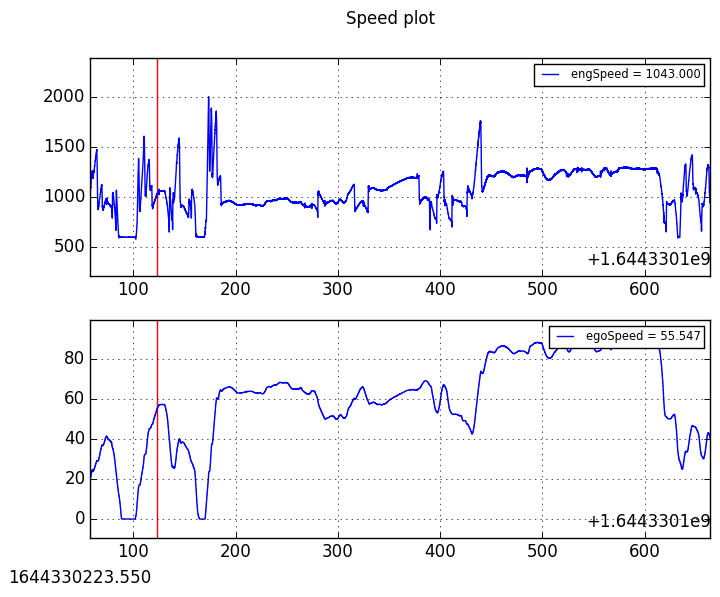

In [75]:
samplePlot.copyContentToFile("samplePlot.png")
Image("samplePlot.png")